<a href="https://colab.research.google.com/github/mdrakibhossain091b1/DATA-RESEARCH-/blob/main/Machine%20Learning/Machine_Learning_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
'''
WorkFlow-
1. Import Necessary (numpy, pandas, matplotlib, seaborn, model, decision tree, matrix)
2. dataset load and Understanding (Total Patients, total column, first 5 Patients, Understand diagnosis column )
3. Prepare Data (Convert string to numbers, load important features, Create X and Y)
4. Train and Test Split
5. Train with Decision Tree
6. Test with Decision Tree (Make predictions, probabilities, Calculate accuracy, predictions vs reality)
7. Test depths 2, 3, 4, 5 and find highest accuracy
8. Test on New Patients
9. Calculate confusion matrix (confusion matrix plot, Accuracy visualization)
10. Calculate detailed metrics (accuracy, precision, recall, f1)

'''
print('Good Luck')

Good Luck


In [2]:
# 1. Import Necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, precision_score,
    recall_score, f1_score, roc_curve, roc_auc_score, auc
)


In [3]:
# 1. dataset load and Understanding
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Dataset/Breast_Cancer_Wisconsin_Dataset.csv')

print(f'Total Patients {len(df)}')
print(f'Each patient has {len(df.columns)-2} medical measurements')
print('\nFirst 5 Patients:\n')
print(df[['texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se']].head())
diagnosis_counts = df['diagnosis'].value_counts()
print(f'There are {diagnosis_counts['M']} malignant patients in the dataset.')
print(f'There are {diagnosis_counts['B']} Benign patients in the dataset.')
print('Malignant = Dangerous Cancer')
print('Benign = Harmless Cancer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total Patients 569
Each patient has 31 medical measurements

First 5 Patients:

   texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0      0.9053         8.589   153.40       0.006399         0.04904   
1      0.7339         3.398    74.08       0.005225         0.01308   
2      0.7869         4.585    94.03       0.006150         0.04006   
3      1.1560         3.445    27.23       0.009110         0.07458   
4      0.7813         5.438    94.44       0.011490         0.02461   

   concavity_se  
0       0.05373  
1       0.01860  
2       0.03832  
3       0.05661  
4       0.05688  
There are 212 malignant patients in the dataset.
There are 357 Benign patients in the dataset.
Malignant = Dangerous Cancer
Benign = Harmless Cancer


In [4]:
# 3. Prepare Data
df['diagnosis_numaric'] = df['diagnosis'].map({'M': 1, 'B': 0})
features = [
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
]
x = df[features]
y = df['diagnosis_numaric']


In [5]:
# 4. Train and Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size= 0.20,
    random_state= 20
)
print(f'Total Training data: {len(x_train)} Patients')
print(f'Total Testing data: {len(x_test)} Patients')

Total Training data: 455 Patients
Total Testing data: 114 Patients


In [6]:
# 5. Train with Decision Tree
doctor = DecisionTreeClassifier(
    max_depth=3,
    random_state=20
)

# Train the model
doctor.fit(x_train, y_train)
print("Doctor training completed!")

Doctor training completed!


In [30]:
# 6. Test with Decision Tree
predictions = doctor.predict(x_test)
probabilities = doctor.predict_proba(x_test)[:, 1]
accuracy = accuracy_score(y_test, predictions)
print(f'Doctor Accuracy: {accuracy*100:.2f}%\n')
print('\nCheck some predictions with confidence:\n')
results = []

for i in range(10):
  actual = 'Malignant' if y_test.iloc[i] == 1 else 'Benign'
  predicted = 'Malignant' if predictions[i] == 1 else 'Benign'
  confidence = probabilities[i] * 100 if probabilities[i] == 1 else (1-probabilities[i])*100
  correct = "✅" if y_test.iloc[i] == predictions[i] else "❌"
  results.append({
    'Actual' : actual,
    'Predicted': predicted,
    'Confidence (%)': round(confidence, 2),
    'Correct': correct
})

data_frame= pd.DataFrame(results)
print(data_frame)




Doctor Accuracy: 85.09%


Check some predictions with confidence:

      Actual  Predicted  Confidence (%) Correct
0     Benign     Benign           78.51       ✅
1  Malignant     Benign          100.00       ❌
2  Malignant  Malignant          100.00       ✅
3     Benign     Benign           98.43       ✅
4  Malignant     Benign           78.51       ❌
5  Malignant  Malignant          100.00       ✅
6  Malignant  Malignant          100.00       ✅
7     Benign     Benign           98.43       ✅
8     Benign     Benign           78.51       ✅
9  Malignant  Malignant          100.00       ✅


In [31]:
# 7. Train With Depth 1
doctor_one = DecisionTreeClassifier(
    max_depth=1,
    random_state=20
)

# Train the model
doctor_one.fit(x_train, y_train)
print("Doctor_One training completed!")

Doctor_One training completed!


In [32]:
# Test with depths 1
predictions_one = doctor_one.predict(x_test)
probabilities_one = doctor_one.predict_proba(x_test)[:, 1]
accuracy_one = accuracy_score(y_test, predictions_one)
print(f'Doctor_one Accuracy: {accuracy_one*100:.2f}%\n')
print('\nCheck some predictions with confidence:\n')
results_one = []

for i in range(10):
  actual_one = 'Malignant' if y_test.iloc[i] == 1 else 'Benign'
  predicted_one = 'Malignant' if predictions_one[i] == 1 else 'Benign'
  confidence_one = probabilities_one[i] * 100 if probabilities_one[i] == 1 else (1-probabilities_one[i])*100
  correct_one = "✅" if y_test.iloc[i] == predictions_one[i] else "❌"
  results_one.append({
    'Actual' : actual_one,
    'Predicted': predicted_one,
    'Confidence (%)': round(confidence_one, 2),
    'Correct': correct_one
})

data_frame_one= pd.DataFrame(results_one)
print(data_frame_one)


Doctor_one Accuracy: 85.09%


Check some predictions with confidence:

      Actual  Predicted  Confidence (%) Correct
0     Benign     Benign           90.17       ✅
1  Malignant     Benign           90.17       ❌
2  Malignant  Malignant           15.62       ✅
3     Benign     Benign           90.17       ✅
4  Malignant     Benign           90.17       ❌
5  Malignant  Malignant           15.62       ✅
6  Malignant  Malignant           15.62       ✅
7     Benign     Benign           90.17       ✅
8     Benign     Benign           90.17       ✅
9  Malignant  Malignant           15.62       ✅


In [33]:
#Train With Depth 2
doctor_two = DecisionTreeClassifier(
    max_depth=2,
    random_state=20
)

# Train the model
doctor_two.fit(x_train, y_train)
print("Doctor_two training completed!")

Doctor_two training completed!


In [34]:
# Test with depths 2
predictions_two = doctor_two.predict(x_test)
probabilities_two = doctor_two.predict_proba(x_test)[:, 1]
accuracy_two = accuracy_score(y_test, predictions_two)
print(f'Doctor_two Accuracy: {accuracy_two*100:.2f}%\n')
print('\nCheck some predictions with confidence:\n')
results_two = []

for i in range(10):
  actual_two = 'Malignant' if y_test.iloc[i] == 1 else 'Benign'
  predicted_two = 'Malignant' if predictions_two[i] == 1 else 'Benign'
  confidence_two = probabilities_two[i] * 100 if probabilities_two[i] == 1 else (1-probabilities_two[i])*100
  correct_two = "✅" if y_test.iloc[i] == predictions_two[i] else "❌"
  results_two.append({
    'Actual' : actual_two,
    'Predicted': predicted_two,
    'Confidence (%)': round(confidence_two, 2),
    'Correct': correct_two
})

data_frame_two= pd.DataFrame(results_two)
print(data_frame_two)


Doctor_two Accuracy: 86.84%


Check some predictions with confidence:

      Actual  Predicted  Confidence (%) Correct
0     Benign     Benign           84.15       ✅
1  Malignant     Benign           84.15       ❌
2  Malignant  Malignant            9.46       ✅
3     Benign     Benign           97.71       ✅
4  Malignant     Benign           84.15       ❌
5  Malignant  Malignant            9.46       ✅
6  Malignant  Malignant            9.46       ✅
7     Benign     Benign           97.71       ✅
8     Benign     Benign           84.15       ✅
9  Malignant  Malignant            9.46       ✅


In [35]:
#Train With Depth 4
doctor_four = DecisionTreeClassifier(
    max_depth=4,
    random_state=20
)

# Train the model
doctor_four.fit(x_train, y_train)
print("Doctor_four training completed!")

Doctor_four training completed!


In [36]:
# Test with depths 4
predictions_four = doctor_four.predict(x_test)
probabilities_four = doctor_four.predict_proba(x_test)[:, 1]
accuracy_four = accuracy_score(y_test, predictions_four)
print(f'Doctor_four Accuracy: {accuracy_four*100:.2f}%\n')
print('\nCheck some predictions with confidence:\n')
results_four = []

for i in range(10):
  actual_four = 'Malignant' if y_test.iloc[i] == 1 else 'Benign'
  predicted_four = 'Malignant' if predictions_four[i] == 1 else 'Benign'
  confidence_four = probabilities_four[i] * 100 if probabilities_four[i] == 1 else (1-probabilities_four[i])*100
  correct_four = "✅" if y_test.iloc[i] == predictions_four[i] else "❌"
  results_four.append({
    'Actual' : actual_four,
    'Predicted': predicted_four,
    'Confidence (%)': round(confidence_four, 2),
    'Correct': correct_four
})

data_frame_four= pd.DataFrame(results_four)
print(data_frame_four)


Doctor_four Accuracy: 83.33%


Check some predictions with confidence:

      Actual  Predicted  Confidence (%) Correct
0     Benign     Benign           100.0       ✅
1  Malignant     Benign           100.0       ❌
2  Malignant  Malignant           100.0       ✅
3     Benign     Benign           100.0       ✅
4  Malignant     Benign           100.0       ❌
5  Malignant  Malignant           100.0       ✅
6  Malignant  Malignant           100.0       ✅
7     Benign     Benign           100.0       ✅
8     Benign     Benign           100.0       ✅
9  Malignant  Malignant           100.0       ✅


In [39]:
# find highest accuracy
print(f'Doctor Accuracy: {accuracy*100:.2f}%')
print(f'Doctor_one Accuracy: {accuracy_one*100:.2f}%')
print(f'Doctor_two Accuracy: {accuracy_two*100:.2f}%')
print(f'Doctor_four Accuracy: {accuracy_four*100:.2f}%')
print('Here, Doctor Two has the highest accuracy.')

Doctor Accuracy: 85.09%
Doctor_one Accuracy: 85.09%
Doctor_two Accuracy: 86.84%
Doctor_four Accuracy: 83.33%
Here, Doctor Two has the highest accuracy.


[[60  6]
 [ 9 39]]


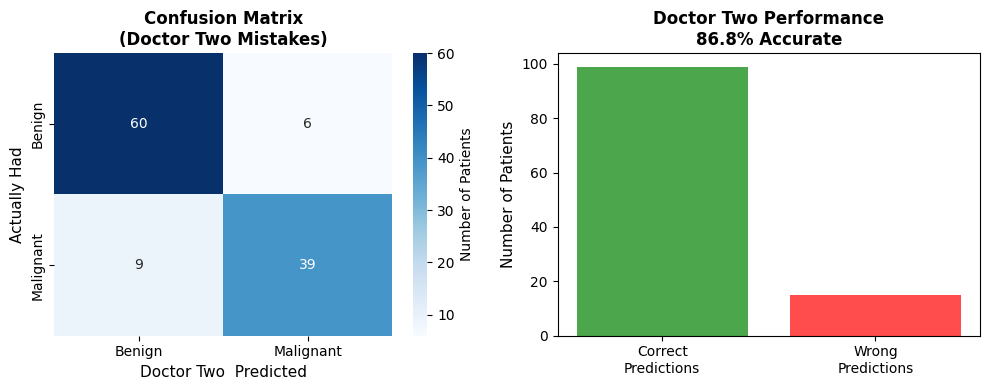

In [43]:
# 9. Calculate confusion matrix (confusion matrix plot, Accuracy visualization)
cm = confusion_matrix(y_test, predictions_two)
print(cm)
plt.figure(figsize=(10, 4))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            cbar_kws={'label': 'Number of Patients'})
plt.title('Confusion Matrix\n(Doctor Two Mistakes)', fontweight='bold', fontsize=12)
plt.xlabel('Doctor Two  Predicted', fontsize=11)
plt.ylabel('Actually Had', fontsize=11)

# Accuracy visualization
plt.subplot(1, 2, 2)
categories = ['Correct\nPredictions', 'Wrong\nPredictions']
values = [cm[0,0] + cm[1,1], cm[0,1] + cm[1,0]]
colors = ['green', 'red']
plt.bar(categories, values, color=colors, alpha=0.7)
plt.title(f'Doctor Two Performance\n{accuracy_two*100:.1f}% Accurate', fontweight='bold', fontsize=12)
plt.ylabel('Number of Patients', fontsize=11)

plt.tight_layout()
plt.show()